In [2]:
# Read external data into the program

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')
# Producing training set and test set


# Here is how you can create a single frame with selected columns

X_features = ['runq-sz','%%memused','proc/s','cswch/s','all_%%usr','ldavg-1','totsck','pgfree/s','plist-sz','file-nr']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)


# Split XY into training set and test set of equal size


train, test = train_test_split(XY, test_size = 0.3)
print("test size:",len(test))

# Sort the train and test sets after index (which became unsorted through sampling)
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]; X_test = test[X_features]
Y_train = train['DispFrames']; Y_test = test['DispFrames']



test size: 1080


In [3]:
#QUESTION 1
# Create linear regression object
regr = RandomForestRegressor()

# Train the model using the training set
regr.fit(X_train, Y_train)

NMAE=np.mean(abs(regr.predict(X_test)-Y_test))/Y_test.mean()
print("NMAE of Random Forest is",NMAE)

NMAE of Random Forest is 0.06308246648277717


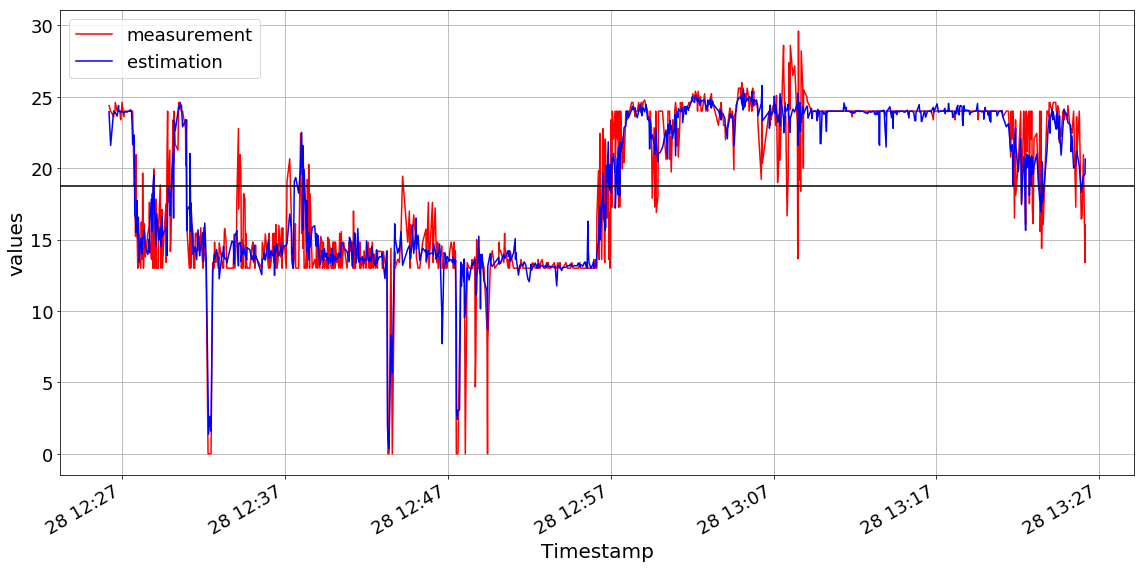

In [4]:
#question 2 
#time series plot
Y_pred = regr.predict(X_test)
result=pd.concat([Y,Y_test],axis=1,join='inner')
timeIndex=pd.to_datetime(result['TimeStamp'],unit='s')
Y_pred_new=pd.Series(Y_pred)
Y_pred_new.index=timeIndex
Y_test.index=pd.to_datetime(result['TimeStamp'],unit='s')

Y_naive=Y_train.mean()
fig,axes=plt.subplots(nrows=1,ncols=1, figsize=(16,8))
measurement= Y_test.plot(color='r')

estimations = Y_pred_new.plot(color='b')
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 20
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.axhline(Y_naive,color='black')
plt.legend(('measurement','estimation'), loc = 'upper left', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()

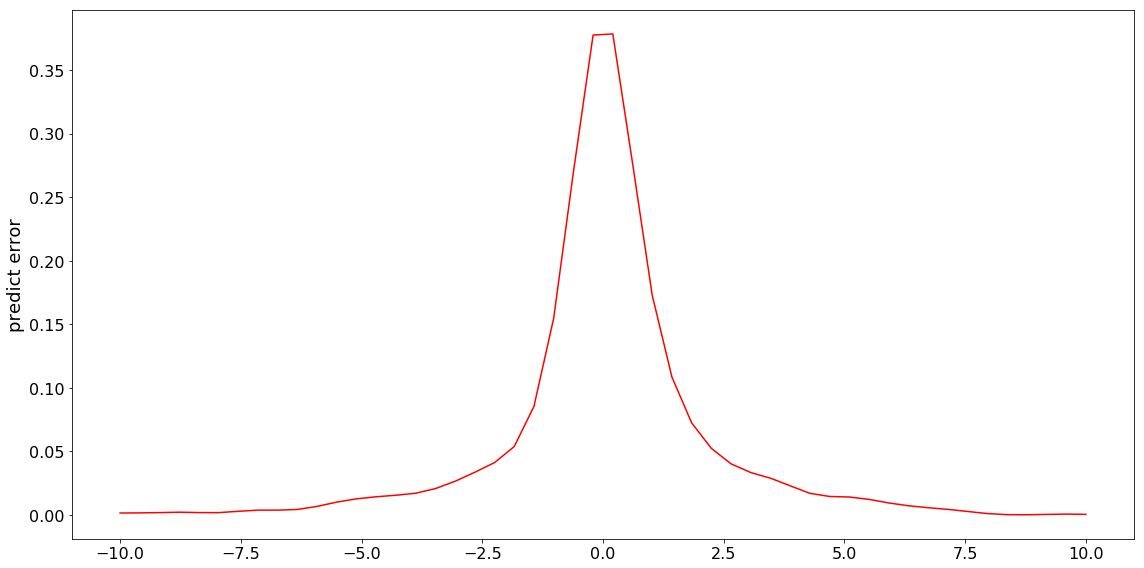

In [5]:
#Question 3
import numpy as np
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

error=Y_test-Y_pred

#Density plot

error.plot.kde(ind=np.linspace(-10,10,50), color='r');

# Customizing plot (changing font size, labels)
font_size = 18
#axes.set_xlabel('DispFrames', fontsize=font_size)
axes.set_ylabel('predict error', fontsize=font_size)
axes.tick_params(axis='both', which='major', labelsize=font_size-2)
axes.tick_params(axis='both', which='minor', labelsize=font_size-4)

plt.tight_layout()
plt.show()

In [6]:
#question 4
import time
start = time.time()
a=list(X_train.columns.values)
feature_importance=[]
importance=list(regr.feature_importances_)
for i in range(0,10):
        feature_importance.append([[a[i]],importance[i]])
print(feature_importance)
importance_sort=sorted(feature_importance, key = lambda feature: feature[1],reverse=True) 
print(importance_sort)

[[['runq-sz'], 0.017216847489855407], [['%%memused'], 0.05908753227228756], [['proc/s'], 0.008541579499129379], [['cswch/s'], 0.017917013963454315], [['all_%%usr'], 0.016190741954832243], [['ldavg-1'], 0.05283346981872844], [['totsck'], 0.11453001274136047], [['pgfree/s'], 0.018923918467976964], [['plist-sz'], 0.6804065727013443], [['file-nr'], 0.014352311091030957]]
[[['plist-sz'], 0.6804065727013443], [['totsck'], 0.11453001274136047], [['%%memused'], 0.05908753227228756], [['ldavg-1'], 0.05283346981872844], [['pgfree/s'], 0.018923918467976964], [['cswch/s'], 0.017917013963454315], [['runq-sz'], 0.017216847489855407], [['all_%%usr'], 0.016190741954832243], [['file-nr'], 0.014352311091030957], [['proc/s'], 0.008541579499129379]]


In [7]:
def top_feature(n):
    top=set(importance_sort[0][0])
    for k in range(0,n-1):
        top=top | set(importance_sort[k+1][0])
    return top

In [8]:
def nmae(n):
    X_train_rf=X_train[list(top_feature(n))]
    X_test_rf=X_test[list(top_feature(n))]
    regr_func = RandomForestRegressor()
    regr_func.fit(X_train_rf,Y_train)
    NMAE=np.mean(abs(regr_func.predict(X_test_rf)-Y_test))/Y_test.mean()
    return NMAE

In [9]:
NMAE_list=[]
for i in range(0,10):
    NMAE=nmae(i)
    NMAE_list.append(NMAE)

The total time of Random Forest is  0.8327503204345703


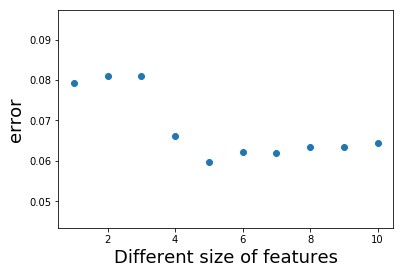

In [10]:
x = [1,2,3,4,5,6,7,8,9,10]
y = NMAE_list
plt.xlabel('Different size of features', fontsize=font_size)
plt.ylabel('error', fontsize=font_size)
plt.scatter(x,y)
end = time.time()
print ("The total time of Random Forest is ",end-start)

In [11]:

# Create linear regression object
regr = RandomForestRegressor()

# Train the model using the training set
regr.fit(X_train, Y_train)

NMAE_test=np.mean(abs(regr.predict(X_test)-Y_test))/Y_test.mean()
NMAE_train=np.mean(abs(regr.predict(X_train)-Y_train))/Y_train.mean()
print(" Random Forest NMAE of test set  is",NMAE_test)
print(" Random Forest NMAE of train set  is",NMAE_train)

 Random Forest NMAE of test set  is 0.06295131475503499
 Random Forest NMAE of train set  is 0.025168496612598127


 Linear model NMAE of test set  is 0.06254698093158291
 Linear model  NMAE of train set  is 0.026619884167034764
